In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo

# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

y = y.values.ravel()
df = pd.DataFrame(X)
df.head(20)

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,1,-1,-1,-1,1,0,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,0,-1,1,0,1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,1,1,1,0,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,1,-1,0,-1,1,0,1


# Part 1

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8291, 30) (2764, 30) (8291,) (2764,)


In [51]:
model = DecisionTreeClassifier(max_depth=5, random_state=20)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=20)

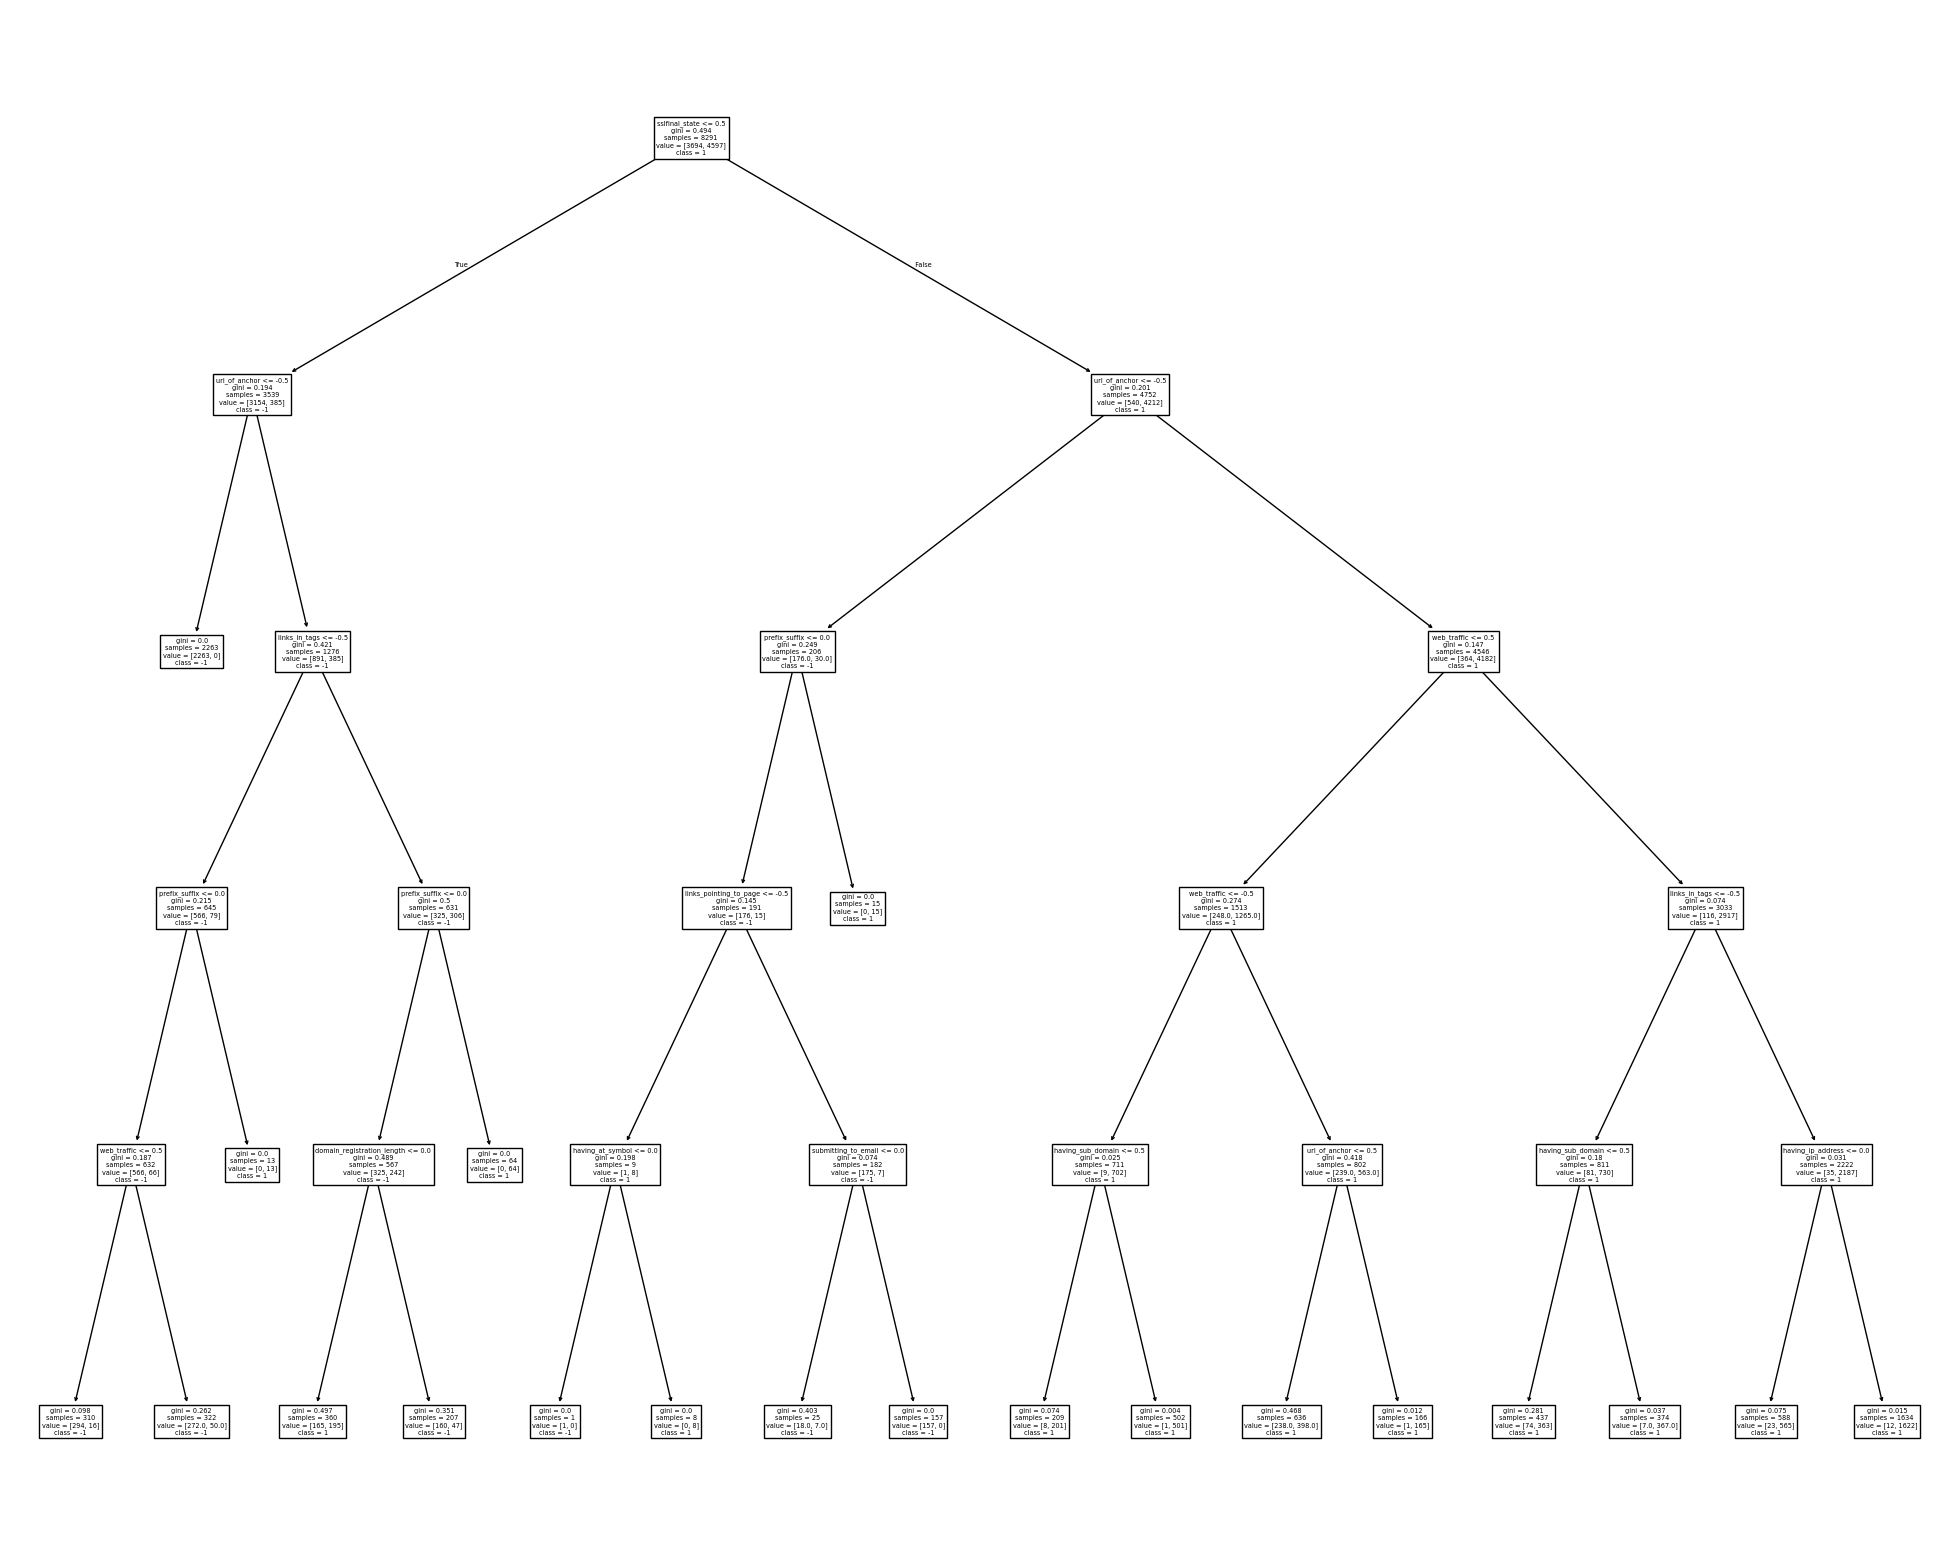

In [52]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names = X.keys(), class_names=['-1', '1'])
plt.show()


In [53]:
model2 = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=20)
cv_score = cross_val_score(model2, X, y, cv=10)
print(f'Fold specific accuracy: {cv_score}')
print(f'Overall accuracy: {cv_score.mean():.4f}')



Fold specific accuracy: [0.98462929 0.98372514 0.97197107 0.98282098 0.98101266 0.97375566
 0.95565611 0.94841629 0.96651584 0.96108597]
Overall accuracy: 0.9710
